## 오차행렬! 출력



In [1]:
print("Hello,world!")

Hello,world!


In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    def predict(self, X):
        return np.zeros( (len(X),1),dtype=bool)
    
digits = load_digits()


In [7]:
y = (digits.target ==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data,y,random_state=11)

print(X_train)

[0 0 0 ... 0 0 0]
[[ 0.  0.  3. ... 12. 14.  7.]
 [ 0.  1.  9. ... 10.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ... 16. 13.  1.]
 [ 0.  1. 11. ... 13. 16.  5.]
 [ 0.  0.  6. ...  6.  0.  0.]]


In [10]:
#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier 로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


# 오차행렬 시작

### TN,FP,FN,TP

**구분은 가능하고 API 사용하기**



In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)


array([[405,   0],
       [ 45,   0]], dtype=int64)

# 정밀도와 재현율



## 정밀도 {TP/(FP+TP)}

정밀도 : Positive 로 예측한 값 중 예측과 실제값이 일치한 데이터의 비율

ex : 실제 Positive 를 Negative 로 판단하면 큰 지장이 생김
암 판단여부 , 보험사기 적중시

대신에 Negative 를 Postivie 로 판단해도 그냥 재검사나 재확인 절차를 거치면 됌.

## 재현율 {TP/(FN+TP)}

재현율 : 실제 값이 Positive 인 대상 중 예측과 실제 값이 Positive 로 일치한 비율


# 코드



In [55]:
from sklearn.metrics import accuracy_score, precision_score , recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도= {1:.4f}, 재현율: {2:.4f}'.format(accuracy,precision,recall))
    
    

# 타이타닉 데이터셋

캐글에 있습니다.
https://www.kaggle.com/c/titanic/data?select=train.csv



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.

titanic_df = pd.read_csv('C:/DB/titanic_train.csv')
print(titanic_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [46]:
## 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1) #axis 가 0 이면 행 방향 , axis 가 1 이면 열 방향
X_titanic_df = transform_features(X_titanic_df)
print(X_titanic_df)

     Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0         3    1  22.000000      1      0   7.2500      7         3
1         1    0  38.000000      1      0  71.2833      2         0
2         3    0  26.000000      0      0   7.9250      7         3
3         1    0  35.000000      1      0  53.1000      2         3
4         3    1  35.000000      0      0   8.0500      7         3
..      ...  ...        ...    ...    ...      ...    ...       ...
886       2    1  27.000000      0      0  13.0000      7         3
887       1    0  19.000000      0      0  30.0000      1         3
888       3    0  29.699118      1      2  23.4500      7         3
889       1    1  26.000000      0      0  30.0000      2         0
890       3    1  32.000000      0      0   7.7500      7         2

[891 rows x 8 columns]


In [56]:
X_train, X_test , y_train , y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                     test_size=0.20, random_state=11)
lr_clf=LogisticRegression(solver='liblinear') #로지스틱 회귀의 최적화 알고리즘 유형 지정
#soliver 는 기본값이 lbfgs 이며 작은 데이터 세트의 경유는 liblinear 이 약간 성능이 좋은 경향이 있습니다. lbfgs 는 크고 다중 분류에 적합! 
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도= 0.8246, 재현율: 0.7705


In [58]:

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]


pred_proba 는 예측확률로 lr_clf 로 이전에 정의한 로지스틱 회귀의 liblinear 을 쓰겠다는 의미입니다.
그래서 proba.shape 를 한 줄로 적겠따는 의미로 실패확률 44.9 , 성공확률 55.0 (이거맞나?확실히는 모르겠지만) 이런느낌인거 같습니다.

In [60]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


# 트레이드 오프 이해

predict() 는 ndarray(n -dimesional 로 다차원을 의미합니다.) 가 정해진 임계값(0.5) 이용하여 최종 예측 정했습니다.

__predict() 구현__

Binarizer 클래스 : threshold 변수를 특정값설정과 객체 생성
Binarizer 객체의 fit_transform() 으로 ndarray 의 값을 지정된 threshold 보다 같거나 작으면 0 , 크면 1로 변환

한마디로 binarizer 로 임계값을 지정하여 2진수 즉, 둘 중 하나로 결정!

In [62]:
from sklearn.preprocessing import Binarizer

X =[[1,-1,2],
   [2,0,0],
   [0, 1.1, 1.2]]

#X 의 개별원소가 threshold 값보다 같거나 작은면 0을 , 크면 1로 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


## 최종 평가 예측값

In [65]:
from sklearn.preprocessing import Binarizer

#Binarizer 의 threshold 설정
custom_threshold =0.5

#predict_proba() 반환값의 2번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer 적용
# Positive 만 추출이란 의미
pred_proba_1 = pred_proba[:,1].reshape(-1,1) #reshape 로 열을 하나만으로 진행
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도= 0.8246, 재현율: 0.7705


### 이제 임곗값 조정하겠습니다.

In [66]:
custom_threshold =0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1) 
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도= 0.7042, 재현율: 0.8197


### 와우. 재현율 급상승 , 정밀도 급하락

---
= Positive 의 확률을 늘렸으니까 당연히 정밀도는 분모에 P가 많아서 하락 , 재현율은 TP(Positive 라 예측해서 맞춘 경우)가 올라서 상승
이라 볼 수 있습니다.

### 그런데 약간 문제인 것은 정확도가 줄었다는 점!
FP (Positive 로 예측했는데 틀린 경우가 11개나 급상승)
TP (Positive 로 예측했는데 맞은 경우는 겨우 3개 상승)
따라서 더 안좋다고 예측할 수 있습니다.

그러면 threshold 를 여러개 만들어서 한 번에 평가해보겠습니다.

In [120]:
thresholds = [0.4,0.45,0.50,0.55,0.60] #threshold 는 한계점이다.
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    #thresholds list 를 차례대로 반복(iteration) 하며 평가(evaluation)
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        #지금까지 pred_proba_1 썼는데 c1에 대해  정의안하고 바로 가능한가? (의문점)
        custom_predict =binarizer.transform(pred_proba_c1)
        print('ㅡㅡ임곗값:', custom_threshold, 'ㅡㅡㅡ')
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1), thresholds)



ㅡㅡ임곗값: 0.4 ㅡㅡㅡ
오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도: 0.7042, 재현율 : 0.8197,F1:0.7576
ㅡㅡ임곗값: 0.45 ㅡㅡㅡ
오차 행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도: 0.7869, 재현율 : 0.7869,F1:0.7869
ㅡㅡ임곗값: 0.5 ㅡㅡㅡ
오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도: 0.8246, 재현율 : 0.7705,F1:0.7966
ㅡㅡ임곗값: 0.55 ㅡㅡㅡ
오차 행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도: 0.8654, 재현율 : 0.7377,F1:0.7965
ㅡㅡ임곗값: 0.6 ㅡㅡㅡ
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도: 0.8980, 재현율 : 0.7213,F1:0.8000


## 정밀도와 재현율이 0.78 , 0.78 로 임곗값이 0.45 일 때 거의 똑같다!

### ? 이런 평가지표 코드에 대해 precision_recall_curve() API 가 있다고 하네요.;;;;;; 하.. 왜 이제 알려줘..
### 그래도 많이 배웠다..

In [74]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때 예측확률
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값과 레이블 값이 1일 떄의 precision_recall_curve 입력
precisions , recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)




반환된 분류 결정 임곗값 배열의 Shape: (147,)


# 일단 패쓰 ---


## 결국 말하고 싶은건
**임곗값 증가에 따른 상관관계**

정밀도는 임곗값이 높아질수록 1이 되고
재현율은 임곗값이 낮아질수록 1이 된다.
둘은 정 반대이고 그 중심에는 0.5가 되는게 아니라 0.6 정도의 값이 여기 예시에서는 나왔다.



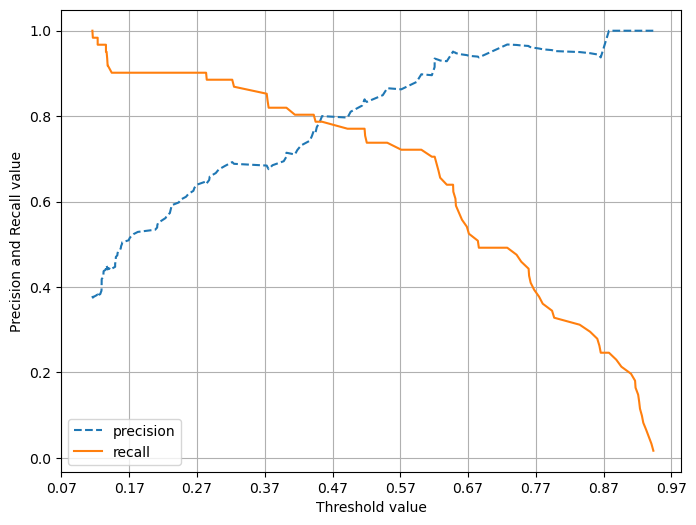

In [79]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label= 'recall')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

    
    

## 정밀도와 재현율의 맹점

둘 중 하나를 극단적으로 높이는 방법은 거짓말에 불가하므로 둘은 상호 보완수준에서 적용되야합니다.






# F1 스코어

- F1스코어 : 정밀도와 재현율을 결합한 지표


# F1 스코어의 [공식]


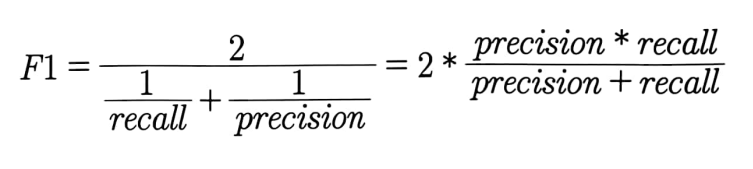


## 약간 살펴보니까 두 값이 같을 때 수가 커질 것 같습니다.
## 한 쪽의 수치가 커지면 한 쪽의 수치는 작아지기 때문입니다.




In [99]:
from sklearn.metrics import f1_score
f1 =f1_score(y_test,pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [118]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy =accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    #f1 score print 추가
    print('정확도 : {0:.4f}, 정밀도: {1:.4f}, 재현율 : {2:.4f},F1:{3:.4f}'. format(accuracy, precision, recall ,f1))
          
     

In [119]:
thresholds = [0.4,0.45,0.50,0.55,0.60 , 0.65 ,0.7, 0.8 ,0.9]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

ㅡㅡ임곗값: 0.4 ㅡㅡㅡ


TypeError: get_clf_eval() takes 2 positional arguments but 3 were given

0.6 일 때 F1 스코어 0.8 로 가장 높습니다.

# 확실한 것은

- F1스코어를 높이려면 정밀도와 정확도 모두 다 크면 F1스코어가 계속 올라갑니다.
- 그리고 정밀도와 정확도가 다른 하나보다 커지게된다면 F1스코어는 작아집니다.
- 조화평균이랑 같습니다..



# ROC 곡선과 AUC



## ROC 곡선과 AUC스코어는 이진 분류의 예측 성능 측정에 중요한 지표

### ROC 곡선 ( Receiver Operation Characteristic Curve) 
- 한국어 : 수신자 판단 곡선 ( 2차대전 때 통신 장비 성능 평가 고안 수치였어서)
- 의료분야에 많이 사용되고 머신러닝의 이진 분류 모델의 예측 성능 판단에 중요 평가 지표





# ROC 곡선의 FPR, TPR 

# 중간과정은 ppt 로 만들어서 약식 생략

## 입력할 파라미터
 - y_true : 실제 클래스 값 array ( array shape = [데이터 건수])
 - y_score : predict_proba() 의 반환 값 array 에서 Positive 칼럼 예측 확률이 보통 사용. array.shape = [n_samples]
 
## 반환 값
- FPR : fpr 값을 array 로 반환
- TPR : tpr 값을 array 로 반환
- thresholds : threshold 값 array

# ROC_curve() API 이용하여 타이타닉 생존자 예측 모델의 FPR, TPR, 임곗값 구하기



In [88]:
from sklearn.metrics import roc_curve

#레이블이 1일 때 예측확률
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs , tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#반환된 임곗값 배열에 샘플 데이터 추출, 임곗값을 5 step 으로 추출
#thresholds[0] 은 max(예측확률)+1 로 임의로 설정됨. 이걸 제외하기위해 np.arange 는 1부터 시작

thr_index =np.arange(1,thresholds.shape[0],5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index],2))

# 5 step 담위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index],3))


샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


## 임곗값이 1에 가까운 값에서 작아질수록 FPR이 점점커짐

## FPR이 조금씩 커질 때 TPR 은 가파르게 커짐.

## FPR의 변화에 따른 TPR의 변화 ROC 곡선 시각화


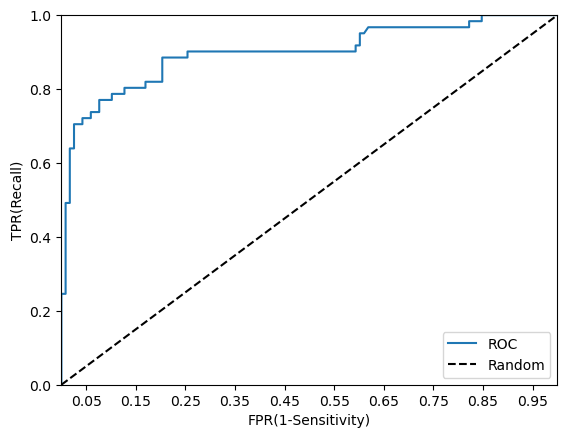

In [89]:
def roc_curve_plot(y_test,pred_proba_c1):
    #임곗값에 따른 FPR, TPR 반환받기
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선 그림
    plt.plot([0,1],[0,1], 'k--',label='Random')
    
    #FPR X 축의 Scale 을 0.1단위로 변경 ,X,Y축 이름 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test,pred_proba[:,1])

    
    

In [90]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.8987


# 방금이랑 뭔가다른 로지스틱 회귀모델의 ROC AUC 는 0.9024 로 측정.
# 따라서 get_clf_eval() 에 roc_auc_score() 이용해 ROC AUC값 측정 로직 추가

> get_clf_eval() 함수에 ROC AUC 가 들어가려면 예측 확률값이 기반이 되어야하므로 
>> get_clf_eval(y_test, pred=None, pred_proba=None) 으로 함수형을 변경해줍니다..

In [127]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    #ROC-AUC 추가|
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #ROC-AUC print 추가..
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
        F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))
    
    #? 이거 뭔가 이상하다..

In [131]:
pred_th_01 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test,pred_th_01,pred_proba[:,1])

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197,        F1: 0.7576, AUC:0.8987
